# Strange Attractors

Load Python libraries

In [1]:
%matplotlib inline
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [2]:
import numpy as np
from scipy.integrate import odeint

from matplotlib import cm as cm
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import cnames
from matplotlib import animation

In [3]:
colors = cm.viridis(np.linspace(0,1,4))

## Lorenz attractor
see
https://en.wikipedia.org/wiki/Lorenz_system and
https://scipython.com/blog/the-lorenz-attractor

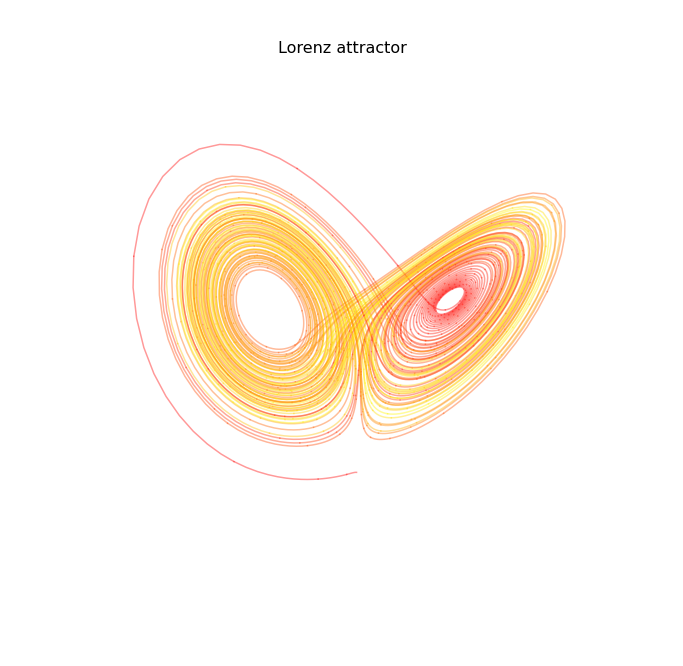

In [4]:
# Lorenz paramters and initial conditions
sigma, beta, rho = 10, 2.667, 28
u0, v0, w0 = 0, 1, 1.05

# Maximum time point and total number of time points
tmax, n = 100, 10000

def lorenz(X, t, sigma, beta, rho):
    """The Lorenz attractor equation"""
    u, v, w = X
    up = -sigma*(u - v)
    vp = rho*u - v - u*w
    wp = -beta*w + u*v
    return up, vp, wp

# Use Odeint to integrate the Lorenz equations on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(lorenz, (u0, v0, w0), t, args=(sigma, beta, rho))
x, y, z = f.T

# Plot the Lorenz attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
for i in range(0,n-s,s):
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()
ax.view_init(30, 120)
ax.set_title("Lorenz attractor", fontsize=16)

plt.show()
fig.savefig('lorenz_1.png')

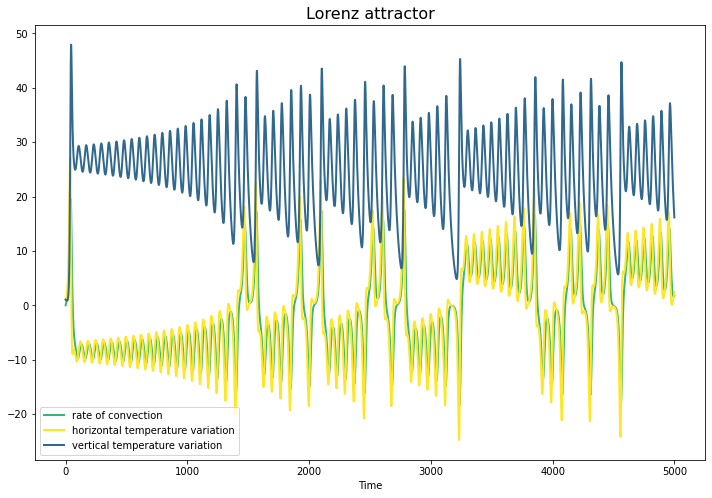

In [5]:
n = 5000
t = range(0, n)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(t, x[:n], color=colors[2], linewidth=2, label="rate of convection")
ax.plot(t, y[:n], color=colors[3], linewidth=2, label="horizontal temperature variation")
ax.plot(t, z[:n], color=colors[1], linewidth=2, label="vertical temperature variation")
ax.set_xlabel('Time')
ax.set_title("Lorenz attractor", fontsize=16)
ax.legend()
fig.savefig('lorenz_2.png')

## Three species predator prey food chain model
see "Modeling Life" from Garfinkel et al. https://link.springer.com/book/10.1007/978-3-319-59731-7
say plants, herbivores and carnivores, for example grass, rabbits, and foxes

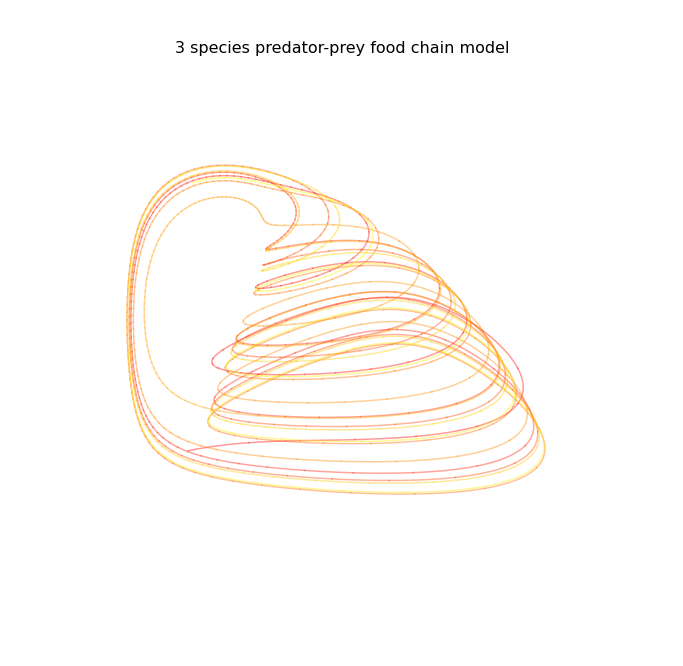

In [6]:
# Predator prey paramters and initial conditions
a1, a2, b1, b2, d1, d2 = 5, 0.1, 3, 2, 0.4, 0.01 
u0, v0, w0 = 1, 0.15, 8

# Maximum time point and total number of time points
tmax, n = 1000, 10000

def predator_prey(X, t, a1, a2, b1, b2, d1, d2):
    """Two species predator prey model"""
    u, v, w = X
    up = u * (1 - u) - (a1 * u) / (1 + b1 * u) * v
    vp = (a1 * u) / (1 + b1 * u) * v - d1 * v - (a2 * v) / (1 + b2 * v) * w
    wp = (a2 * v) / (1 + b2 * v) * w - d2 * w
    return up, vp, wp

# Use Odeint to integrate the differential equation on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(predator_prey, (u0, v0, w0), t, args=(a1, a2, b1, b2, d1, d2))
x, y, z = f.T

# Plot the attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
timesteps = range(0,n-s,s)
for i in timesteps:
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()
ax.view_init(30, 50)
ax.set_title("3 species predator-prey food chain model", fontsize=16)

plt.show()
fig.savefig('predator_prey_1.png')

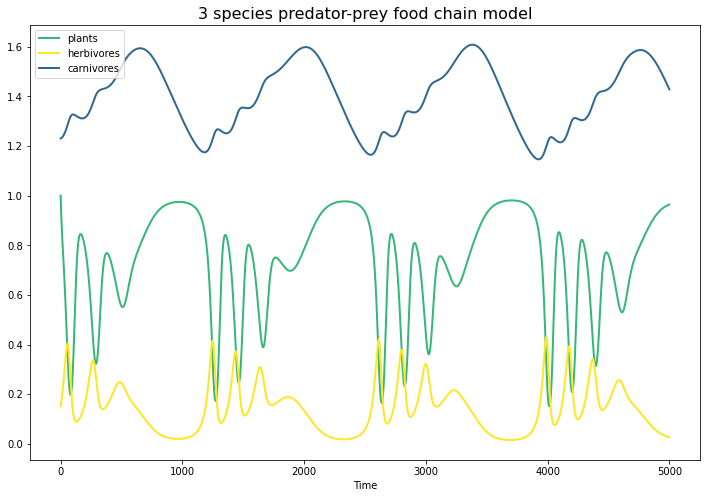

In [7]:
n = 5000
s = 10
t = range(0, n)

fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(t, x[:n], color=colors[2], linewidth=2, label="plants")
ax.plot(t, y[:n], color=colors[3], linewidth=2, label="herbivores")
ax.plot(t, z[:n]/6.5, color=colors[1], linewidth=2, label="carnivores")
ax.set_xlabel('Time')
ax.set_title("3 species predator-prey food chain model", fontsize=16)
ax.legend()

fig.savefig('predator_prey_2.png')

## Rössler Attractor

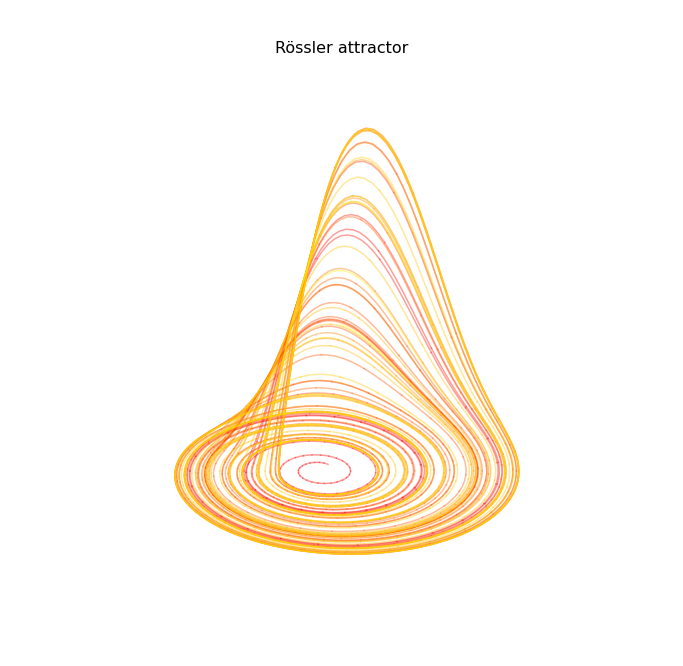

In [8]:
# Rössler attractor parameters and initial conditions
a, b, c  = 0.2, 0.2, 5.7
u0, v0, w0 = 1, 0.15, 0

# Maximum time point and total number of time points
tmax, n = 500, 20000

def roessler(X, t, a1, a2, b1, b2, d1, d2):
    """Rössler attractor"""
    u, v, w = X
    up = - v - w
    vp = u + a * v
    wp = b + w * (u - c)
    return up, vp, wp

# Use Odeint to integrate the differential equation on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(roessler, (u0, v0, w0), t, args=(a1, a2, b1, b2, d1, d2))
x, y, z = f.T

# Plot the Rössler attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
timesteps = range(0,n-s,s)
for i in timesteps:
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()
ax.view_init(30, 220)
ax.set_title("Rössler attractor", fontsize=16)

plt.show()
fig.savefig('roessler_1.png')

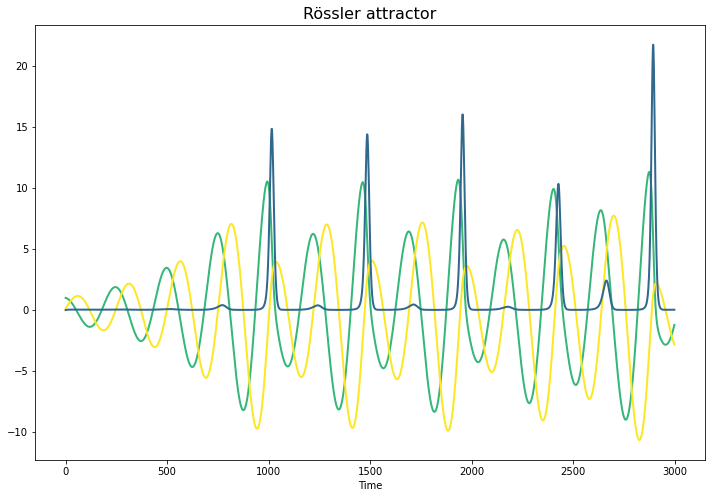

In [9]:
n = 3000
t = range(0, n)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(t, x[:n], color=colors[2], linewidth=2)
ax.plot(t, y[:n], color=colors[3], linewidth=2)
ax.plot(t, z[:n], color=colors[1], linewidth=2)
ax.set_xlabel('Time')
ax.set_title("Rössler attractor", fontsize=16)
fig.savefig('roessler_2.png')

## Chua's attractor

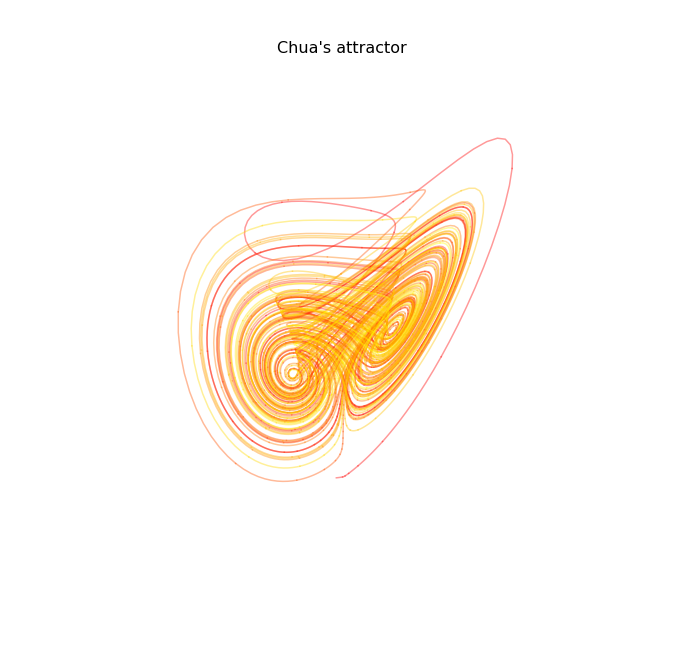

In [10]:
# Chua's attractor parameters and initial conditions
a, c, b = 40, 28, 3
u0, v0, w0 = 1, 0.15, 0

# Maximum time point and total number of time points
tmax, n = 100, 20000

def chua(X, t, a1, a2, b1, b2, d1, d2):
    """Chua's attractor"""
    u, v, w = X
    up = a * (v - u)
    vp = (c - a) * u - u * w + c * v
    wp = u * v - b * w
    return up, vp, wp

# Use Odeint to integrate the differential equation on the time grid t
t = np.linspace(0, tmax, n)
f = odeint(chua, (u0, v0, w0), t, args=(a1, a2, b1, b2, d1, d2))
x, y, z = f.T

# Plot Chua's attractor using a Matplotlib 3D projection
fig = plt.figure(figsize=(12,12))
ax = fig.gca(projection='3d')

# Make the line multi-coloured by plotting it in segments of length s which
# change in colour across the whole time series.
s = 10
c = np.linspace(0,1,n)
timesteps = range(0,n-s,s)
for i in timesteps:
    ax.plot(x[i:i+s+1], y[i:i+s+1], z[i:i+s+1], color=(1,c[i],0), alpha=0.4)

# Remove all the axis clutter, leaving just the curve.
ax.set_axis_off()
ax.view_init(30, 90)
ax.set_title("Chua's attractor", fontsize=16)

plt.show()
fig.savefig('chua_1.png')

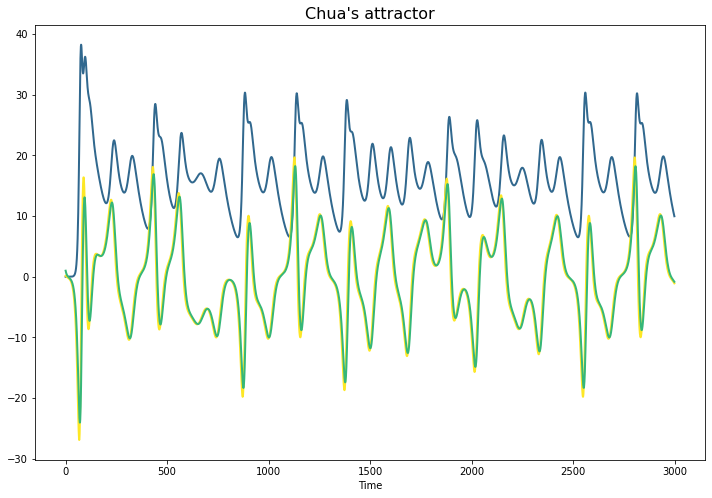

In [11]:
n = 3000
t = range(0, n)
fig = plt.figure(figsize=(12,8))
ax = fig.add_subplot(111)
ax.plot(t, z[:n], color=colors[1], linewidth=2)
ax.plot(t, y[:n], color=colors[3], linewidth=2)
ax.plot(t, x[:n], color=colors[2], linewidth=2)
ax.set_xlabel('Time')
ax.set_title("Chua's attractor", fontsize=16)
fig.savefig('chua_2.png')